In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing and Understanding the Dataset

In [2]:
df=pd.read_csv('super store_project.csv')

In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [5]:
df['Sales'].describe()

count     9800.000000
mean       230.769059
std        626.651875
min          0.444000
25%         17.248000
50%         54.490000
75%        210.605000
max      22638.480000
Name: Sales, dtype: float64

In [6]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [7]:
df['Ship Mode'].value_counts()

Ship Mode
Standard Class    5859
Second Class      1902
First Class       1501
Same Day           538
Name: count, dtype: int64

**Standard Class** (5,859 orders): This shipping mode is the most commonly used, likely because it is cost-effective or part of the default option for many customers.

**Second Class** (1,902 orders): This is a mid-tier shipping option that might offer faster delivery than Standard Class but at a higher cost.

**First Class** (1,501 orders): This is a premium shipping option, offering quicker delivery times, possibly with added benefits like tracking or insurance.

**Same Day** (538 orders): This is the least used shipping mode, which likely offers the fastest delivery but at a significantly higher cost, making it less popular.

In [8]:
df['Segment'].value_counts()

Segment
Consumer       5101
Corporate      2953
Home Office    1746
Name: count, dtype: int64

In [9]:
df['State'].value_counts()[:5]

State
California      1946
New York        1097
Texas            973
Pennsylvania     582
Washington       504
Name: count, dtype: int64

In [10]:
df.shape

(9800, 18)

In [11]:
df['City'].value_counts()

City
New York City        891
Los Angeles          728
Philadelphia         532
San Francisco        500
Seattle              426
                    ... 
Hagerstown             1
Arlington Heights      1
East Orange            1
San Luis Obispo        1
Springdale             1
Name: count, Length: 529, dtype: int64

# Preprocessing

In [12]:
df.isna().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [13]:
df1=df.drop(columns=['Row ID', 'Order ID','Customer ID','Country','Postal Code','Product ID'])

In [14]:
df1['Order Date'] = pd.to_datetime(df1['Order Date'], format='%d/%m/%Y')
df1['Ship Date'] = pd.to_datetime(df1['Ship Date'], format='%d/%m/%Y')

# Visualization

In [15]:
region_sales = df1.groupby('Region')['Sales'].sum()
region_sales

Region
Central    492646.9132
East       669518.7260
South      389151.4590
West       710219.6845
Name: Sales, dtype: float64

([<matplotlib.patches.Wedge at 0x199240cdfd0>,
 [Text(0.8523090615228606, 0.6953914463422892, 'Central'),
  Text(-0.7318921319184329, 0.8211783650559065, 'East'),
  Text(-0.890242851576143, -0.6461173772756599, 'South'),
  Text(0.6066866963598533, -0.9175681187028937, 'West')],
 [Text(0.464895851739742, 0.37930442527761227, '21.8%'),
  Text(-0.399213890137327, 0.4479154718486762, '29.6%'),
  Text(-0.4855870099506234, -0.35242766033217804, '17.2%'),
  Text(0.3309200161962836, -0.5004917011106692, '31.4%')])

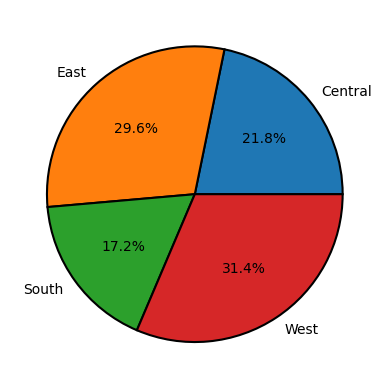

In [16]:
plt.pie(region_sales, labels=region_sales.index, autopct='%1.1f%%',wedgeprops={'edgecolor': 'black', 'linewidth': 1.5})

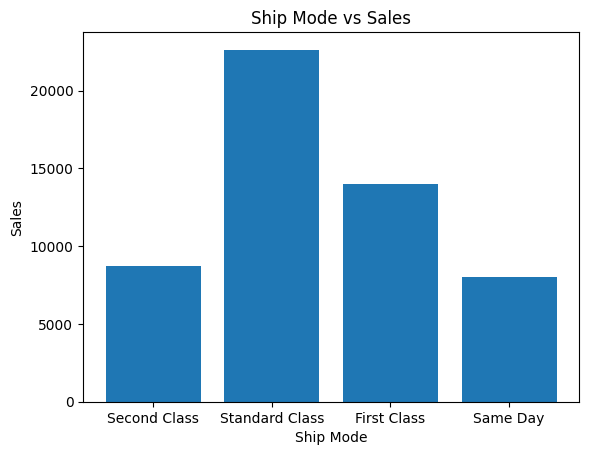

In [17]:
plt.bar(df1['Ship Mode'],df['Sales'])
plt.title('Ship Mode vs Sales')
plt.xlabel('Ship Mode')
plt.ylabel('Sales')
plt.show()

In [18]:
df1.columns

Index(['Order Date', 'Ship Date', 'Ship Mode', 'Customer Name', 'Segment',
       'City', 'State', 'Region', 'Category', 'Sub-Category', 'Product Name',
       'Sales'],
      dtype='object')

In [19]:
sales_state=df1.groupby('State')['Sales'].sum().sort_values(ascending=False)[:10]
sales_state

State
California      446306.4635
New York        306361.1470
Texas           168572.5322
Washington      135206.8500
Pennsylvania    116276.6500
Florida          88436.5320
Illinois         79236.5170
Michigan         76136.0740
Ohio             75130.3500
Virginia         70636.7200
Name: Sales, dtype: float64

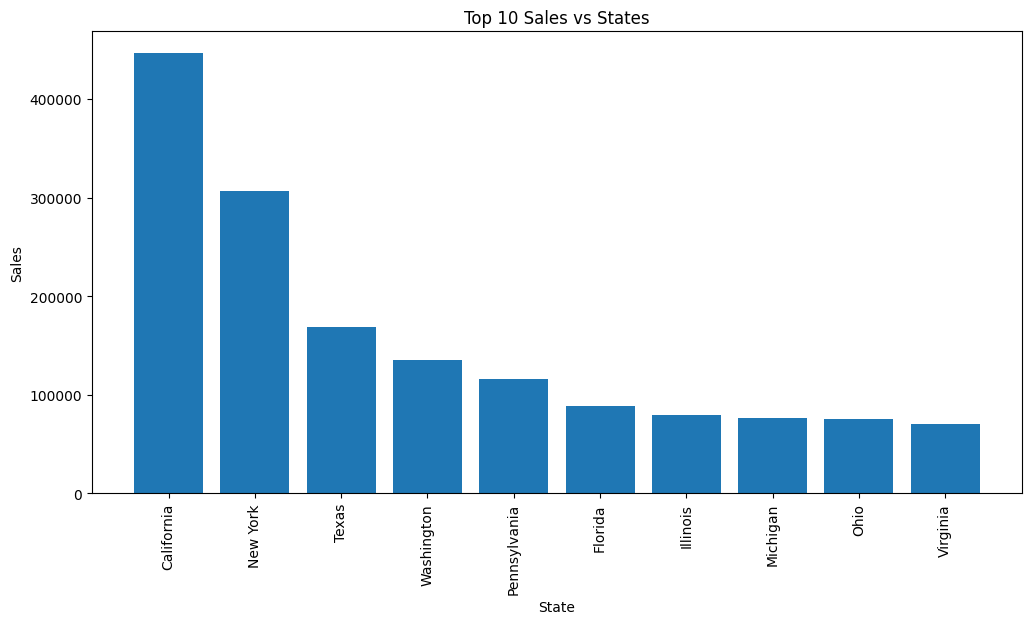

In [20]:
plt.figure(figsize=(12,6))
plt.bar(sales_state.index,sales_state)
plt.title("Top 10 Sales vs States")
plt.xlabel('State')
plt.ylabel('Sales')
plt.xticks(rotation=90)
plt.show()

In [21]:
df1['delivery time']=df1['Ship Date']-df1['Order Date']
df1['delivery time']

0      3 days
1      3 days
2      4 days
3      7 days
4      7 days
        ...  
9795   7 days
9796   5 days
9797   5 days
9798   5 days
9799   5 days
Name: delivery time, Length: 9800, dtype: timedelta64[ns]

In [22]:
df1[df1.State=='California'].groupby('Ship Mode')['delivery time'].mean()

Ship Mode
First Class      2 days 02:03:49.299363057
Same Day         0 days 02:15:23.076923076
Second Class     3 days 03:55:01.554404145
Standard Class   4 days 23:51:04.304694419
Name: delivery time, dtype: timedelta64[ns]

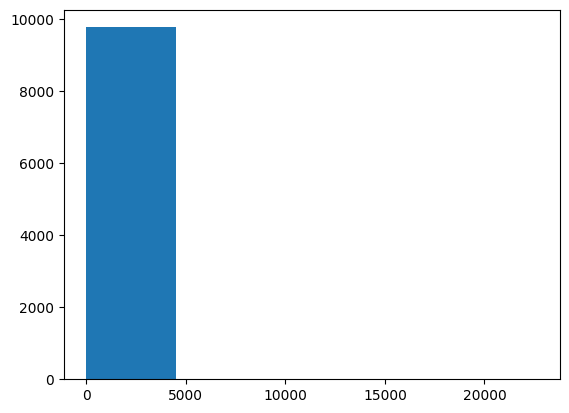

In [23]:
plt.hist(df1['Sales'],bins=5)
plt.show()

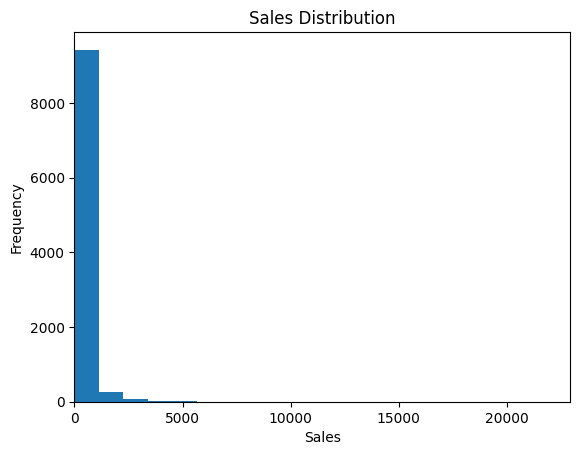

In [24]:
plt.hist(df1['Sales'], bins=20)  # Increase the number of bins
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Sales Distribution')
plt.xlim(0,df1['Sales'].max()+300)
plt.show()

In [25]:
df1['Sales'].max()

np.float64(22638.48)

# Outlier Removal

C:\Users\MANU & MANI\AppData\Local\Temp\ipykernel_4600\3205782439.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['Sales'])


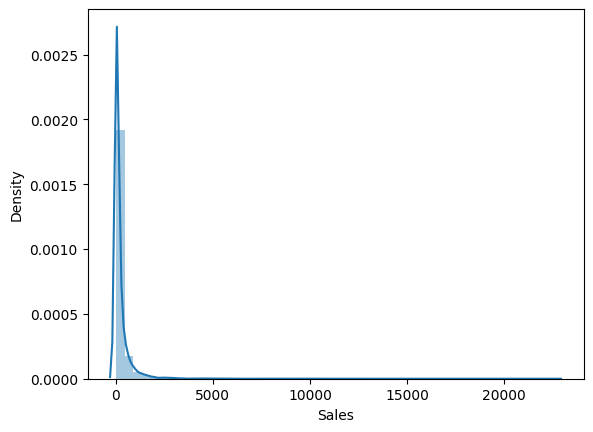

In [26]:
sns.distplot(df1['Sales'])
plt.show()

In [27]:
from scipy.stats import zscore
df1['Z_Score'] = zscore(df1['Sales'])

In [28]:
df2 = df1[(df1['Z_Score'] <= 3) & (df1['Z_Score'] >= -3)]
df2 = df2.drop(columns=['Z_Score'])

In [29]:
df2.shape

(9677, 13)

In [30]:
df2=df2.sort_values(by='Order Date')
df2

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales,delivery time
7980,2015-01-03,2015-01-07,Standard Class,Darren Powers,Consumer,Houston,Texas,Central,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,4 days
741,2015-01-04,2015-01-08,Standard Class,Phillina Ober,Home Office,Naperville,Illinois,Central,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,4 days
740,2015-01-04,2015-01-08,Standard Class,Phillina Ober,Home Office,Naperville,Illinois,Central,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,4 days
739,2015-01-04,2015-01-08,Standard Class,Phillina Ober,Home Office,Naperville,Illinois,Central,Office Supplies,Labels,Avery 508,11.784,4 days
1759,2015-01-05,2015-01-12,Standard Class,Mick Brown,Consumer,Philadelphia,Pennsylvania,East,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,7 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...
908,2018-12-30,2019-01-03,Standard Class,Patrick O'Donnell,Consumer,New York City,New York,East,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,52.776,4 days
1296,2018-12-30,2019-01-03,Standard Class,Erica Bern,Corporate,Fairfield,California,West,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,4 days
1297,2018-12-30,2019-01-03,Standard Class,Erica Bern,Corporate,Fairfield,California,West,Office Supplies,Binders,GBC Binding covers,20.720,4 days
5091,2018-12-30,2019-01-03,Standard Class,Jill Matthias,Consumer,Loveland,Colorado,West,Office Supplies,Fasteners,Bagged Rubber Bands,3.024,4 days


In [31]:
df2.set_index('Order Date',inplace=True)
df_monthly= df2['Sales'].resample('M').sum()

C:\Users\MANU & MANI\AppData\Local\Temp\ipykernel_4600\797352567.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly= df2['Sales'].resample('M').sum()


In [32]:
df_monthly

Order Date
2015-01-31    11631.8870
2015-02-28     4519.8920
2015-03-31    29067.3870
2015-04-30    23742.8050
2015-05-31    20928.3730
2015-06-30    31056.5596
2015-07-31    23416.3090
2015-08-31    27117.5365
2015-09-30    46874.6278
2015-10-31    28717.4410
2015-11-30    60271.9247
2015-12-31    52503.9305
2016-01-31    10965.3936
2016-02-29     9409.4310
2016-03-31    22834.4384
2016-04-30    30341.4985
2016-05-31    21618.4265
2016-06-30    20548.9980
2016-07-31    26298.6090
2016-08-31    30938.3822
2016-09-30    55821.4720
2016-10-31    28558.3075
2016-11-30    58632.3575
2016-12-31    62168.5292
2017-01-31    18542.4910
2017-02-28    14228.8650
2017-03-31    29905.9550
2017-04-30    29579.8370
2017-05-31    36080.1820
2017-06-30    32223.7580
2017-07-31    33090.7430
2017-08-31    27655.1443
2017-09-30    59094.5873
2017-10-31    32147.1970
2017-11-30    63160.9468
2017-12-31    80707.3810
2018-01-31    24868.6020
2018-02-28    19920.9974
2018-03-31    39463.5428
2018-04-30    

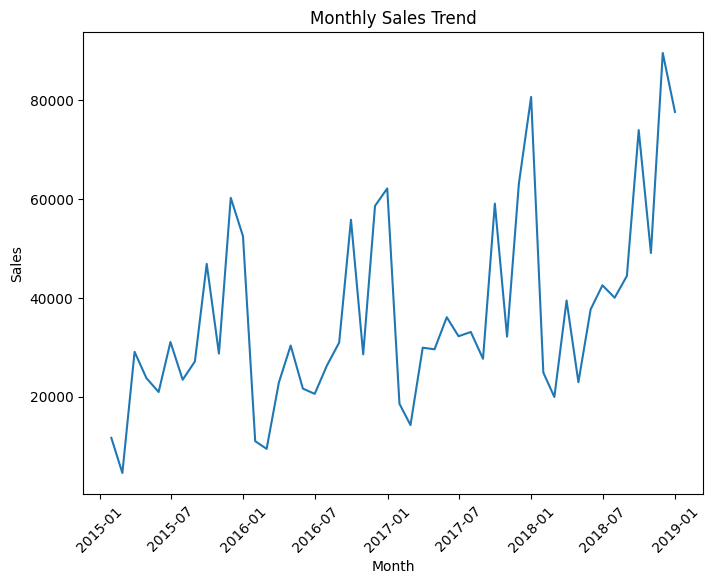

In [33]:
plt.figure(figsize=(8,6))
plt.plot(df_monthly)
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Monthly Sales Trend')
plt.show()

In [34]:
df_monthly

Order Date
2015-01-31    11631.8870
2015-02-28     4519.8920
2015-03-31    29067.3870
2015-04-30    23742.8050
2015-05-31    20928.3730
2015-06-30    31056.5596
2015-07-31    23416.3090
2015-08-31    27117.5365
2015-09-30    46874.6278
2015-10-31    28717.4410
2015-11-30    60271.9247
2015-12-31    52503.9305
2016-01-31    10965.3936
2016-02-29     9409.4310
2016-03-31    22834.4384
2016-04-30    30341.4985
2016-05-31    21618.4265
2016-06-30    20548.9980
2016-07-31    26298.6090
2016-08-31    30938.3822
2016-09-30    55821.4720
2016-10-31    28558.3075
2016-11-30    58632.3575
2016-12-31    62168.5292
2017-01-31    18542.4910
2017-02-28    14228.8650
2017-03-31    29905.9550
2017-04-30    29579.8370
2017-05-31    36080.1820
2017-06-30    32223.7580
2017-07-31    33090.7430
2017-08-31    27655.1443
2017-09-30    59094.5873
2017-10-31    32147.1970
2017-11-30    63160.9468
2017-12-31    80707.3810
2018-01-31    24868.6020
2018-02-28    19920.9974
2018-03-31    39463.5428
2018-04-30    

In [35]:
df_monthly.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 48 entries, 2015-01-31 to 2018-12-31
Freq: ME
Series name: Sales
Non-Null Count  Dtype  
--------------  -----  
48 non-null     float64
dtypes: float64(1)
memory usage: 768.0 bytes


In [36]:
type(df_monthly.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [37]:
df_monthly.head()

Order Date
2015-01-31    11631.887
2015-02-28     4519.892
2015-03-31    29067.387
2015-04-30    23742.805
2015-05-31    20928.373
Freq: ME, Name: Sales, dtype: float64

In [39]:
df_monthly.index = pd.to_datetime(df_monthly.index)

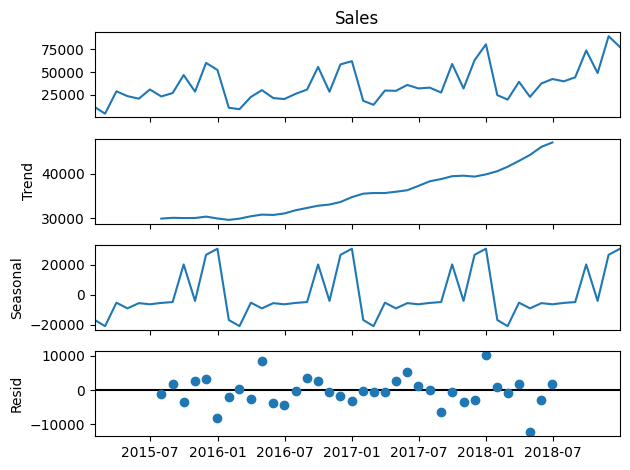

In [41]:
from statsmodels.tsa.seasonal import seasonal_decompose
ms = df_monthly #As df_monthly is a series, we cannot pass the column name as we do with a dataframe
decomposition = seasonal_decompose(ms, model='additive', period=12)

decomposition.plot()
plt.show()

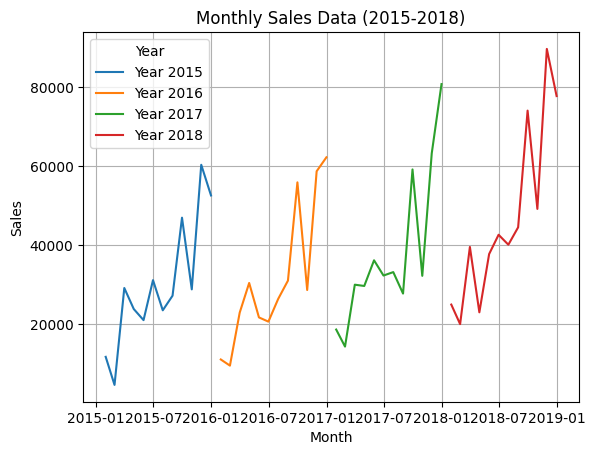

In [42]:
for i in range(2015, 2019):
    plt.plot(df_monthly[df_monthly.index.year == i], label=f'Year {i}')

plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Monthly Sales Data (2015-2018)')
plt.legend(title='Year')
plt.grid(True)
plt.show()

#  Stationarity and ACF, PACF plots

In [43]:
df_monthly=df_monthly.reset_index()
from statsmodels.tsa.stattools import adfuller

print("Statistical Tests: Dickey-Fuller Test")

adf_result = adfuller(df_monthly['Sales'])

print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')

if adf_result[1] <= 0.05:
    print("Reject the null hypothesis - The time series is stationary.")
else:
    print("Fail to reject the null hypothesis - The time series is non-stationary.")

Statistical Tests: Dickey-Fuller Test
ADF Statistic: -4.0172479218866055
p-value: 0.001322840741208308
Reject the null hypothesis - The time series is stationary.


In [44]:
df_monthly.shape

(48, 2)

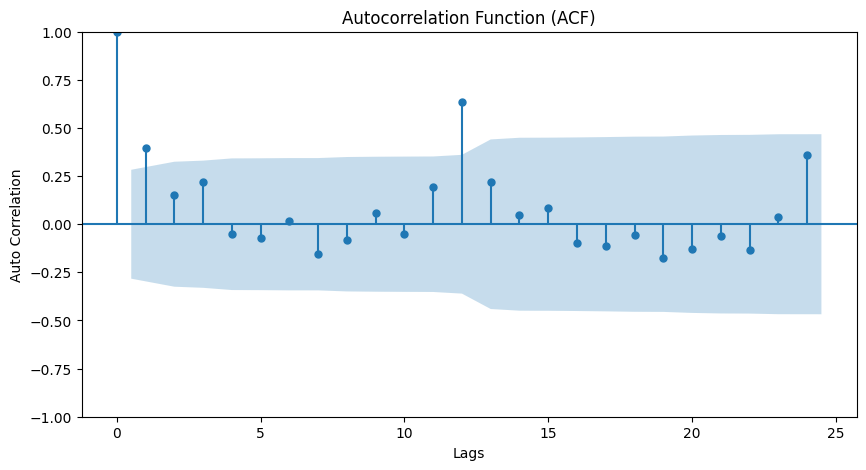

In [45]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(10, 5))
plot_acf(df_monthly['Sales'], ax=plt.gca(), lags=24)
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lags')
plt.ylabel('Auto Correlation')
plt.show()

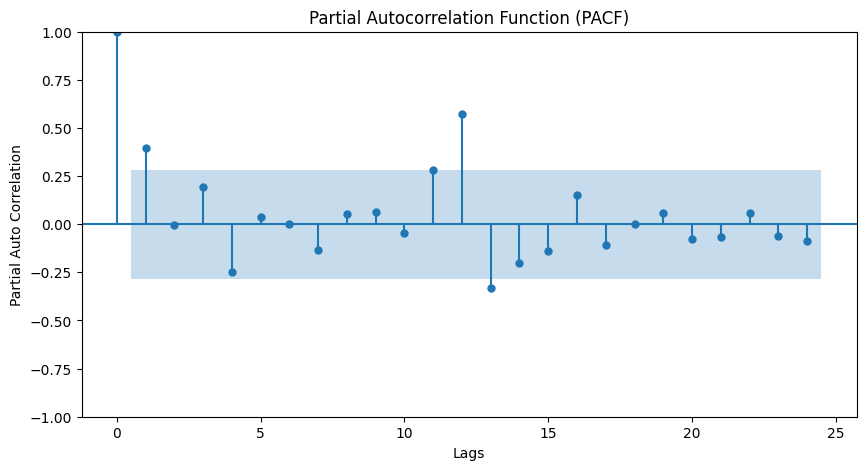

In [46]:
plt.figure(figsize=(10, 5))
plot_pacf(df_monthly['Sales'], ax=plt.gca(), lags=24)
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lags')
plt.ylabel('Partial Auto Correlation')
plt.show()

Auto-Regressive (AR) Order:

**PACF Analysis**: The AR order is typically the lag number at which the PACF values drop to near-zero. For the provided PACF values, the AR order could be around 12, where the PACF values start stabilizing.

Moving Average (MA) Order:

**ACF Analysis**: The MA order is typically the lag number at which the ACF values drop to near-zero. For the provided ACF values, the MA order could be around 12, where the ACF values start stabilizing.

# Splitting the Dataset

In [47]:
df_monthly.shape

(48, 2)

In [48]:
train=df_monthly.iloc[:36]
test=df_monthly.iloc[36:]

In [49]:
train

,Order Date,Sales
0,2015-01-31,11631.8870
1,2015-02-28,4519.8920
2,2015-03-31,29067.3870
3,2015-04-30,23742.8050
4,2015-05-31,20928.3730
5,2015-06-30,31056.5596
6,2015-07-31,23416.3090
7,2015-08-31,27117.5365
8,2015-09-30,46874.6278
9,2015-10-31,28717.4410


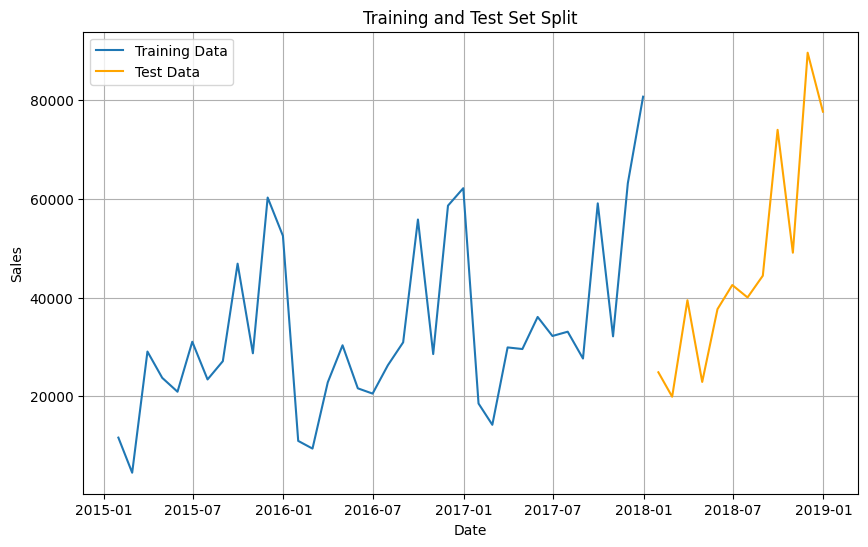

In [50]:
plt.figure(figsize=(10, 6))
plt.plot(train['Order Date'], train['Sales'], label='Training Data')
plt.plot(test['Order Date'], test['Sales'], label='Test Data', color='orange')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Training and Test Set Split')
plt.legend()
plt.grid()
plt.show()

# ARIMA Model

In [51]:
train.set_index('Order Date', inplace=True)

In [52]:
from statsmodels.tsa.arima.model import ARIMA

arma_model = ARIMA(train['Sales'], order=(12, 0, 12))
results = arma_model.fit()

C:\Users\MANU & MANI\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\MANU & MANI\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\MANU & MANI\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\MANU & MANI\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting pa

In [53]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   36
Model:               ARIMA(12, 0, 12)   Log Likelihood                -389.055
Date:                Sun, 11 Jan 2026   AIC                            830.110
Time:                        14:15:44   BIC                            871.282
Sample:                    01-31-2015   HQIC                           844.480
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.318e+04   1.78e+04      1.859      0.063   -1799.281    6.82e+04
ar.L1          0.0552      3.730      0.015      0.988      -7.256       7.367
ar.L2         -0.1303      3.332     -0.039      0.969      -6.661       6.401
ar.L3          0.0025      2.604      0.001      0.999      -5.102       5.107
ar.L4         -0.1700      4.549     -0.037      0.970      -9.086       8.746
ar.L5         -0.0478      2.943     -0.016      0.987      -5.816       5.720
ar.L6         -0.0726      3.157     -0.023      0.982      -6.260       6.115
ar.L7         -0.1692      2.898     -0.058      0.953      -5.848       5.510
ar.L8         -0.0334      4.532     -0.007      0.994      -8.916       8.849
ar.L9         -0.1431      2.986     -0.048      0.962      -5.995       5.709
ar.L10        -0.1031      4.722     -0.022      0.983      -9.357       9.151
ar.L11        -0.1697      3.497     -0.049      0.961      -7.024       6.684
ar.L12         0.6679      4.075      0.164      0.870      -7.319       8.655
ma.L1          0.3027      5.590      0.054      0.957     -10.654      11.259
ma.L2          0.2263      3.956      0.057      0.954      -7.528       7.980
ma.L3          0.1847      4.137      0.045      0.964      -7.924       8.294
ma.L4          0.1608      7.537      0.021      0.983     -14.612      14.934
ma.L5          0.1980      5.192      0.038      0.970      -9.978      10.374
ma.L6          0.1484      4.835      0.031      0.976      -9.328       9.624
ma.L7          0.1535      5.302      0.029      0.977     -10.238      10.545
ma.L8          0.1250      8.162      0.015      0.988     -15.872      16.122
ma.L9          0.1564      5.504      0.028      0.977     -10.631      10.943
ma.L10         0.1202      8.084      0.015      0.988     -15.725      15.965
ma.L11         0.0879      8.181      0.011      0.991     -15.946      16.121
ma.L12        -0.0825      7.220     -0.011      0.991     -14.233      14.068
sigma2      2.292e+08      0.731   3.13e+08      0.000    2.29e+08    2.29e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                 0.82
Prob(Q):                              0.83   Prob(JB):                         0.66
Heteroskedasticity (H):               0.67   Skew:                             0.29
Prob(H) (two-sided):                  0.49   Kurtosis:                         2.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.25e+24. Standard errors may be unstable.
"""

In [54]:
pred=results.predict(start=36,end=47,dynamic=True)
print(pred)

2018-01-31    32905.491983
2018-02-28    24461.398700
2018-03-31    32156.858451
2018-04-30    25580.442357
2018-05-31    36328.218547
2018-06-30    28552.006632
2018-07-31    26303.963062
2018-08-31    26684.844010
2018-09-30    45130.327130
2018-10-31    28747.672257
2018-11-30    47093.979984
2018-12-31    67775.447661
Freq: ME, Name: predicted_mean, dtype: float64


In [55]:
test.set_index('Order Date', inplace=True)

In [56]:
df_monthly.set_index('Order Date', inplace=True)

<Axes: xlabel='Order Date'>

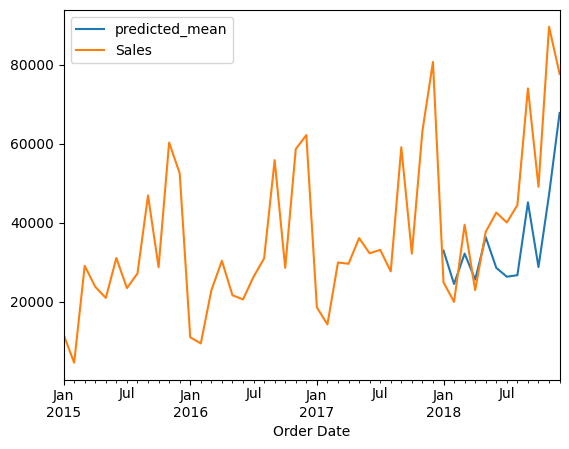

In [57]:
pred.plot(legend=True)
df_monthly['Sales'].plot(legend=True)

In [58]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(test['Sales'], pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 333294721.3283201


In [59]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(test['Sales'], pred)

print(f'Mean Absolute Error (MAE): {mae}')

Mean Absolute Error (MAE): 14248.480292217724


# PMDARIMA

In [60]:
!pip install pmdarima

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/711.9 kB ? eta -:--:--
   --------------------------------------- 711.9/711.9 kB 15.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ---------------------------------------- 2.8/2.8 MB 23.1 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [61]:
from pmdarima import auto_arima

import warnings
warnings.filterwarnings('ignore')

In [62]:
stepwise_fit = auto_arima(df_monthly['Sales'], trace=True,max_p=13, max_q=13, start_p=0, start_q=0,
                          seasonal=True,
                          m=12,
                          suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=746.562, Time=0.54 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=743.335, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=741.305, Time=0.37 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=741.131, Time=0.29 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=740.217, Time=0.12 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=741.157, Time=0.21 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=743.131, Time=0.42 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=742.104, Time=0.16 sec
 ARIMA(0,1,2)(0,1,0)[12]             : AIC=742.170, Time=0.09 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=740.045, Time=0.02 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=741.285, Time=0.14 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=743.283, Time=0.65 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=742.703, Time=0.08 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=742.522, Time=0.49 sec
 ARIMA(1,1,0)(0,1,0)[12] intercep

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   48
Model:             SARIMAX(1, 1, 0)x(0, 1, 0, 12)   Log Likelihood                -368.023
Date:                            Sun, 11 Jan 2026   AIC                            740.045
Time:                                    14:16:15   BIC                            743.156
Sample:                                01-31-2015   HQIC                           741.119
                                     - 12-31-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2972      0.116     -2.572      0.010      -0.524      -0.071
sigma2      7.545e+07    2.9e-10   2.61e+17      0.000    7.54e+07    7.54e+07
===================================================================================
Ljung-Box (L1) (Q):                   1.49   Jarque-Bera (JB):                 2.53
Prob(Q):                              0.22   Prob(JB):                         0.28
Heteroskedasticity (H):               1.69   Skew:                            -0.63
Prob(H) (two-sided):                  0.38   Kurtosis:                         3.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.2e+32. Standard errors may be unstable.
"""

In [63]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


sarima_model = SARIMAX(train['Sales'],
                       order=(1, 1, 0),
                       seasonal_order=(0, 1, 0, 12))

results_sarima = sarima_model.fit()
results_sarima.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                   36
Model:             SARIMAX(1, 1, 0)x(0, 1, 0, 12)   Log Likelihood                -238.725
Date:                            Sun, 11 Jan 2026   AIC                            481.450
Time:                                    14:16:15   BIC                            483.721
Sample:                                01-31-2015   HQIC                           482.021
                                     - 12-31-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2139      0.155     -1.382      0.167      -0.517       0.089
sigma2       5.92e+07   2.52e-10   2.35e+17      0.000    5.92e+07    5.92e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.81   Jarque-Bera (JB):                 1.06
Prob(Q):                              0.37   Prob(JB):                         0.59
Heteroskedasticity (H):               0.99   Skew:                             0.20
Prob(H) (two-sided):                  0.99   Kurtosis:                         2.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.2e+33. Standard errors may be unstable.
"""

In [64]:
pred1=results_sarima.predict(start=36,end=47,dynamic=True)
print(pred1)

2018-01-31    34084.479170
2018-02-28    30411.896949
2018-03-31    45951.864552
2018-04-30    45655.077703
2018-05-31    52149.148626
2018-06-30    48294.066682
2018-07-31    49160.764609
2018-08-31    43725.227316
2018-09-30    75164.657181
2018-10-31    48217.269690
2018-11-30    79231.018889
2018-12-31    96777.453218
Freq: ME, Name: predicted_mean, dtype: float64


<Axes: xlabel='Order Date'>

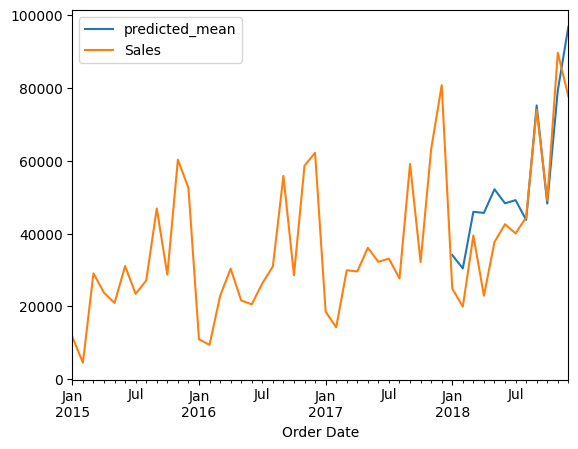

In [65]:
pred1.plot(legend=True)
df_monthly['Sales'].plot(legend=True)

In [66]:
from sklearn.metrics import mean_squared_error

mse1 = mean_squared_error(test['Sales'], pred1)
print(f"Mean Squared Error: {mse1}")

Mean Squared Error: 129688679.62888004


In [67]:
from sklearn.metrics import mean_absolute_error

mae1 = mean_absolute_error(test['Sales'], pred1)

print(f'Mean Absolute Error (MAE): {mae1}')

Mean Absolute Error (MAE): 9213.387999514984


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


sarima_model1 = SARIMAX(train['Sales'],
                       order=(12, 0, 12),
                       seasonal_order=(0, 1, 0, 12))

results_sarima1 = sarima_model1.fit()
results_sarima1.summary()


In [ ]:
pred2=results_sarima1.predict(start=36,end=47,dynamic=True)
print(pred2)

2018-01-31    19134.644853
2018-02-28    21187.050371
2018-03-31    38321.463452
2018-04-30    34834.158853
2018-05-31    41448.820029
2018-06-30    36609.911808
2018-07-31    36530.747788
2018-08-31    36066.500434
2018-09-30    68841.742221
2018-10-31    35141.699356
2018-11-30    64371.364377
2018-12-31    86856.285792
Freq: M, Name: predicted_mean, dtype: float64


<Axes: xlabel='Order Date'>

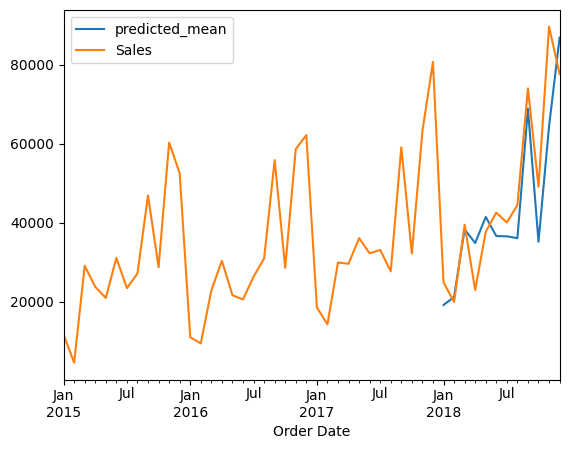

In [ ]:
pred2.plot(legend=True)
df_monthly['Sales'].plot(legend=True)

In [ ]:
from sklearn.metrics import mean_squared_error

mse2 = mean_squared_error(test['Sales'], pred2)
print(f"Mean Squared Error: {mse2}")

Mean Squared Error: 104383600.2513629


In [ ]:
from sklearn.metrics import mean_absolute_error

mae2 = mean_absolute_error(test['Sales'], pred2)

print(f'Mean Absolute Error (MAE): {mae2}')

Mean Absolute Error (MAE): 7932.3349128959135


# Fb Prophet

In [ ]:
from prophet import Prophet
prophet_train=train.reset_index()
prophet_test=test.reset_index()

In [ ]:
prophet_train.columns = ['ds', 'y']
prophet_test.columns = ['ds', 'y']

In [ ]:
modelfb = Prophet()
modelfb.fit(prophet_train)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx3wn6qon/5qlf0pmi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx3wn6qon/s5z6s16o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13477', 'data', 'file=/tmp/tmpx3wn6qon/5qlf0pmi.json', 'init=/tmp/tmpx3wn6qon/s5z6s16o.json', 'output', 'file=/tmp/tmpx3wn6qon/prophet_modelsakkp1q0/prophet_model-20240920143201.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:32:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:32:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = prophet_test[['ds']]
pred3 = modelfb.predict(future)

In [ ]:
pred3.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-31,40166.357087,19467.055874,26765.681827,40159.407750,40173.340599,-17179.114640,-17179.114640,-17179.114640,-17179.114640,-17179.114640,-17179.114640,0.0,0.0,0.0,22987.242447
1,2018-02-28,40586.582293,14608.123308,21786.078609,40563.207543,40609.677873,-22377.388773,-22377.388773,-22377.388773,-22377.388773,-22377.388773,-22377.388773,0.0,0.0,0.0,18209.193520
2,2018-03-31,41051.831629,34646.675265,42331.750931,41007.157060,41097.244595,-2534.339727,-2534.339727,-2534.339727,-2534.339727,-2534.339727,-2534.339727,0.0,0.0,0.0,38517.491902
3,2018-04-30,41502.072921,32616.145182,40190.414743,41428.320623,41571.971780,-5143.141678,-5143.141678,-5143.141678,-5143.141678,-5143.141678,-5143.141678,0.0,0.0,0.0,36358.931243
4,2018-05-31,41967.322257,31798.681480,39006.233199,41866.164811,42068.628564,-6707.501041,-6707.501041,-6707.501041,-6707.501041,-6707.501041,-6707.501041,0.0,0.0,0.0,35259.821215


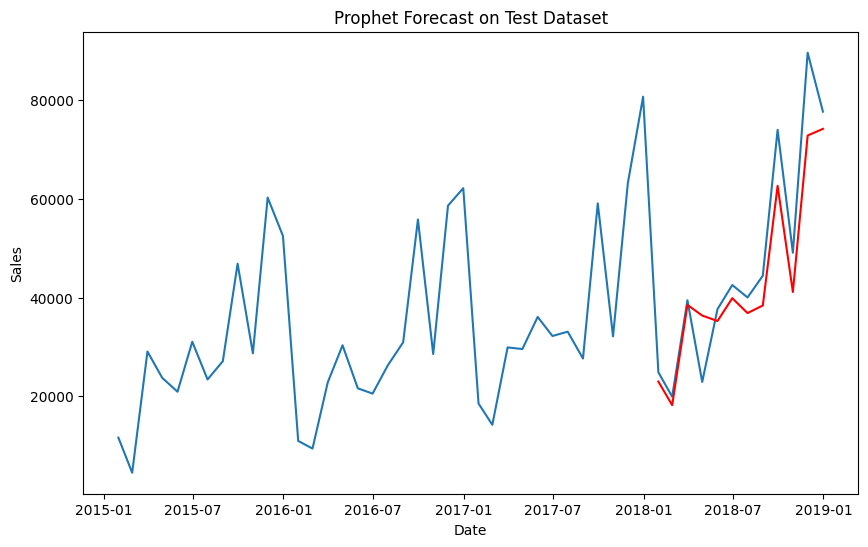

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df_monthly)
plt.plot(pred3['ds'], pred3['yhat'], color='red')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Prophet Forecast on Test Dataset')
plt.show()

In [ ]:
mse3 = mean_squared_error(test['Sales'],pred3['yhat'])
print(f"Mean Squared Error: {mse3}")

Mean Squared Error: 61082596.17041168


In [ ]:
from sklearn.metrics import mean_absolute_error

mae3 = mean_absolute_error(test['Sales'], pred3['yhat'])

print(f'Mean Absolute Error (MAE): {mae3}')

Mean Absolute Error (MAE): 5984.670776104474


In [ ]:
from sklearn.metrics import r2_score


y_true = test['Sales']
y_pred = pred3['yhat']

r2 = r2_score(y_true, y_pred)

n = len(y_true)
k = 1

adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)

print(f'R² Score: {r2}')
print(f'Adjusted R² Score: {adjusted_r2}')


R² Score: 0.8670072752133032
Adjusted R² Score: 0.8537080027346335


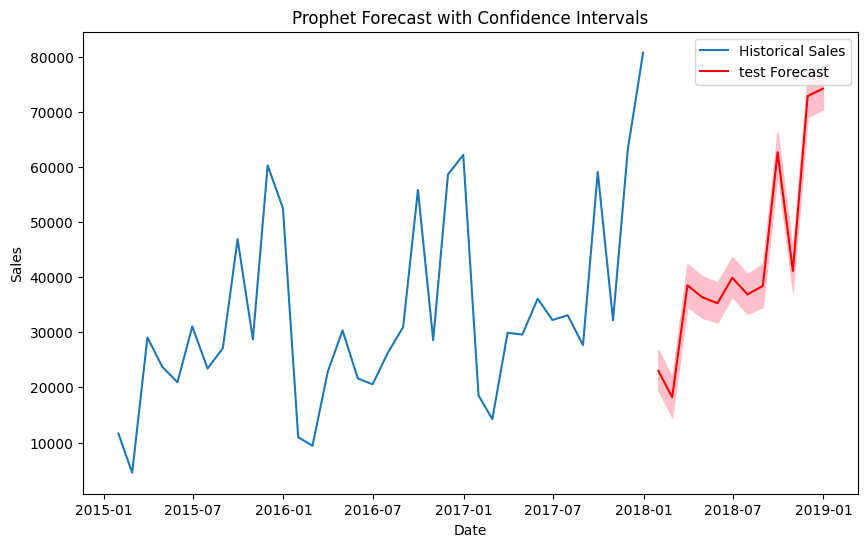

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(prophet_train['ds'], prophet_train['y'], label='Historical Sales')
plt.plot(pred3['ds'], pred3['yhat'], label='test Forecast', color='red')
plt.fill_between(pred3['ds'], pred3['yhat_lower'], pred3['yhat_upper'], color='pink')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Prophet Forecast with Confidence Intervals')
plt.legend()
plt.show()

# Choosing a Model

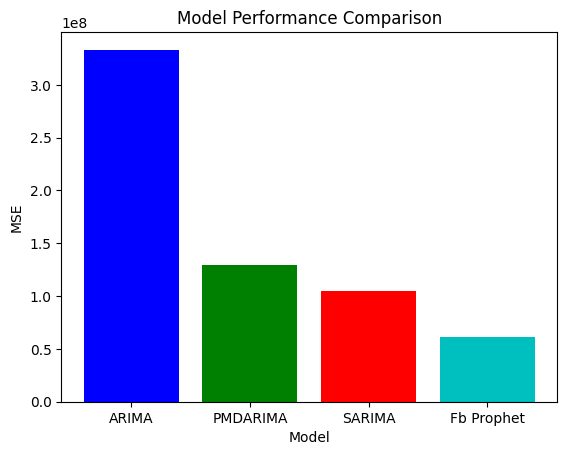

In [ ]:
plt.bar(['ARIMA','PMDARIMA','SARIMA','Fb Prophet'],[mse,mse1,mse2,mse3],color=['b', 'g', 'r', 'c'])
plt.xlabel('Model')
plt.ylabel('MSE')
plt.title('Model Performance Comparison')
plt.show()

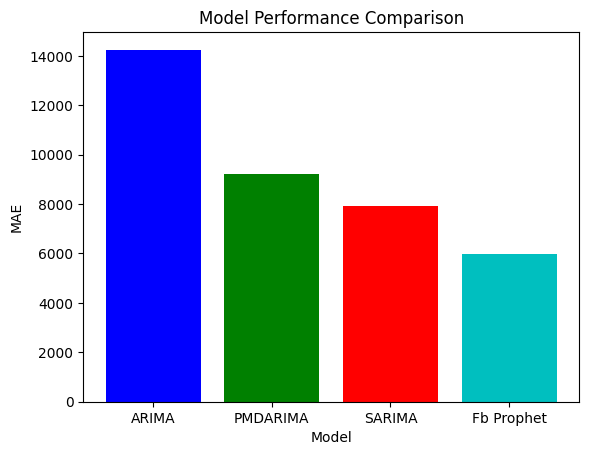

In [ ]:
plt.bar(['ARIMA','PMDARIMA','SARIMA','Fb Prophet'],[mae,mae1,mae2,mae3],color=['b', 'g', 'r', 'c'])
plt.xlabel('Model')
plt.ylabel('MAE')
plt.title('Model Performance Comparison')
plt.show()

# Future Forecast with Fb Prophet

In [ ]:
last_date = prophet_test['ds'].max()
last_date

Timestamp('2018-12-31 00:00:00')

In [ ]:
future_dates = pd.date_range(start=last_date, periods=7, freq='M')[1:]
future_df = pd.DataFrame({'ds': future_dates})

In [ ]:
future_df

,ds
0,2019-01-31
1,2019-02-28
2,2019-03-31
3,2019-04-30
4,2019-05-31
5,2019-06-30


In [ ]:
future_6months = future_df[['ds']]
pred_future = modelfb.predict(future_6months)
pred_future.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-01-31,45644.292812,24510.171956,31562.728700,45636.931349,45651.533969,-17445.150798,-17445.150798,-17445.150798,-17445.150798,-17445.150798,-17445.150798,0.0,0.0,0.0,28199.142014
1,2019-02-28,46064.518018,19660.965716,26864.285080,46039.398426,46088.153876,-22979.074260,-22979.074260,-22979.074260,-22979.074260,-22979.074260,-22979.074260,0.0,0.0,0.0,23085.443759
2,2019-03-31,46529.767354,42938.970533,49953.212297,46482.003538,46578.054098,102.095219,102.095219,102.095219,102.095219,102.095219,102.095219,0.0,0.0,0.0,46631.862573
3,2019-04-30,46980.008646,36408.782995,43928.633112,46906.702850,47059.651960,-6985.273892,-6985.273892,-6985.273892,-6985.273892,-6985.273892,-6985.273892,0.0,0.0,0.0,39994.734754
4,2019-05-31,47445.257982,36028.967901,43021.190023,47346.269722,47555.448081,-7789.791330,-7789.791330,-7789.791330,-7789.791330,-7789.791330,-7789.791330,0.0,0.0,0.0,39655.466651


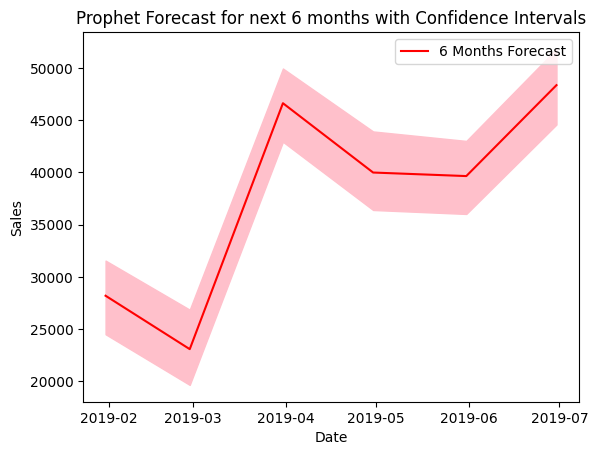

In [ ]:
plt.plot(pred_future['ds'], pred_future['yhat'], label='6 Months Forecast', color='red')
plt.fill_between(pred_future['ds'], pred_future['yhat_lower'], pred_future['yhat_upper'], color='pink')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Prophet Forecast for next 6 months with Confidence Intervals')
plt.legend()
plt.show()

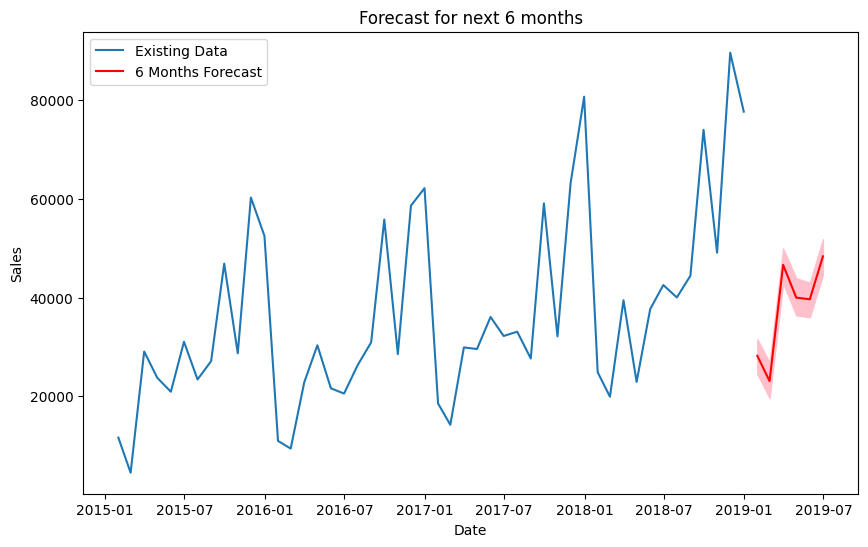

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(df_monthly,label='Existing Data')
plt.plot(pred_future['ds'], pred_future['yhat'], label='6 Months Forecast', color='red')
plt.fill_between(pred_future['ds'], pred_future['yhat_lower'], pred_future['yhat_upper'], color='pink')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title("Forecast for next 6 months")
plt.legend()
plt.show()